# Describing "Motorbike Ambulance Calls"

Motorcycle accidents and related ambulance calls are highly dependent on environmental and seasonal conditions, such as weather, precipitation, day of the week, season, hour of the day, and so on. Data were collected every hour for two years and then correlated with the relevant weather and seasonality.

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              - weathersit :
                  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Import required libraries and download data

**Task 1** preparation of data for processing

1. download a sample of `motorbike_ambulance_calls.csv`;
2. connect the necessary libraries;
3. display basic statistical information on numerical variables;
4. separately display the maximum and minimum values for all variables;
5. display the dimension of the dataset;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str) -> pd.DataFrame:
    data = pd.read_csv(data_path)
    return data

In [3]:
data = get_data(data_path='motorbike_ambulance_calls.csv')

In [4]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [5]:
print(data.max())
print(' ')
print(data.min())

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp               1
atemp              1
hum                1
windspeed     0.8507
cnt              977
dtype: object
 
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp              0
hum                0
windspeed          0
cnt                1
dtype: object


In [6]:
data.shape

(17379, 15)

**Task 2** Let's check the data types and check the amount of data for each variable.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Task 3** Now let's look if there are any NaN

In [8]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Conclusions

1. Loaded the dataset using function, for better code reusability, with this f-tion you can download different datasets without having to rewrite the code, well, and output the basic initial data (statistics, size, minimum and maximum) about our dataset for further work. **One thing that i can already see, it's index column, for our future model it will be redundant because it don't give any valuable information**
2. Basically we have most columns numerical (float, int), and only two columns of type object: date and season
3. There is no NaN in the dataset

**Task 4** convert the variable `date` to **date type**. Define the time limits of the dataset.

In [9]:
#print(data.date.head(700))
def tranform_date(df: pd.DataFrame, date_col_name: str) -> pd.DataFrame:
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df
  
data = tranform_date(data, 'date')
data.date

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [10]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
    
get_time_limits(data,'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


## Conclusions

4. Converted our date variable from data type object to datetime for further processing of data based on time **(Time series)**, then we found our time limits, they range from January 1, 2011 to December 31, 2012

### Analysis of categorical variables

**Task 5** Let's put categorical variables in a separate dataset







In [11]:
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']].copy()
data_categorical.head(7000)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
6995,winter,0,10,2,0,1,1,1
6996,winter,0,10,3,0,1,1,1
6997,winter,0,10,4,0,1,1,1
6998,winter,0,10,5,0,1,1,1


**Task 6** convert the variable `season` into a numerical scale.

In [12]:
def encode_season(df: pd.DataFrame, season_col_name: str) -> pd.DataFrame:
    conditions = [
    (df[season_col_name] == 'spring'),
    (df[season_col_name] == 'summer'),
    (df[season_col_name] == 'autumn'),
    (df[season_col_name] == 'winter')]
    values = [1, 2, 3, 4]
    df[season_col_name] = np.select(conditions, values)
    return df
  
data = encode_season(data, 'season')
data.head(7000)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,2011-10-24,4,0,10,2,0,1,1,1,0.40,0.4091,0.87,0.1045,7
6996,6997,2011-10-24,4,0,10,3,0,1,1,1,0.40,0.4091,0.82,0.0896,4
6997,6998,2011-10-24,4,0,10,4,0,1,1,1,0.40,0.4091,0.82,0.0000,6
6998,6999,2011-10-24,4,0,10,5,0,1,1,1,0.38,0.3939,0.87,0.0000,21


**Task 7** build `countplot` for all categorical variables

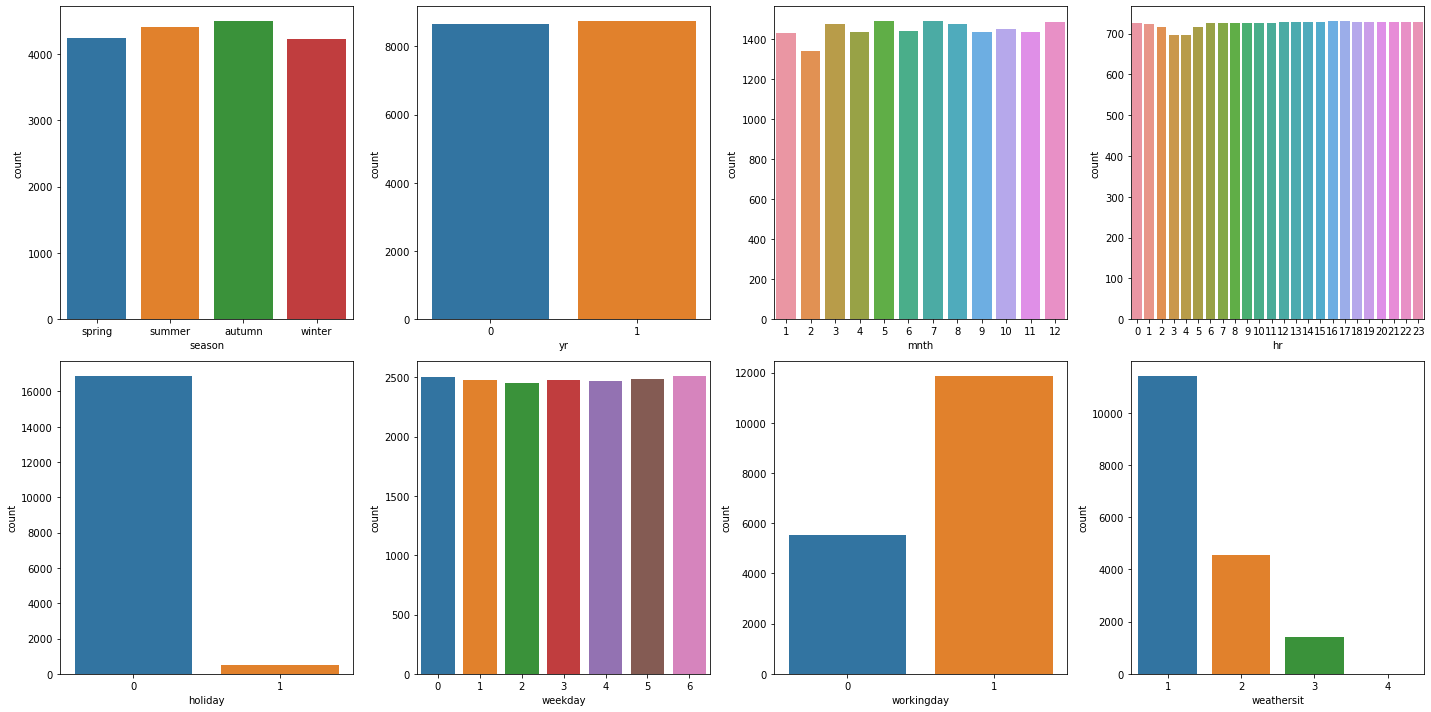

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    #print(variable)
    #print(subplot)
    sns.countplot(x=variable,data=data_categorical,ax=subplot)
plt.tight_layout()    

## Conclusions

5. Allocated categorical variables in a separate dataset for easy visualization of only categorical data.
6. To apply categorical data in models, they must be numeric, so we converted our season variable from object to numeric, for quality model performance
7. Using countplot from seaborn we can see some insights about our data, but at the moment it is impossible to make any loud conclusions, for example on the holiday chart unbalanced data, similarly to weatherisit therefore we simply visualized the data that it is possible more comfortably. was to see the big picture for future calculations or hypotheses.



### Analysis of numerical variables

**Task 8** select numeric variables in a separate dataset

In [14]:
data_numerical = data[['temp','atemp','hum','windspeed']].copy()
data_numerical

,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0000
1,0.22,0.2727,0.80,0.0000
2,0.22,0.2727,0.80,0.0000
3,0.24,0.2879,0.75,0.0000
4,0.24,0.2879,0.75,0.0000
...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642
17375,0.26,0.2576,0.60,0.1642
17376,0.26,0.2576,0.60,0.1642
17377,0.26,0.2727,0.56,0.1343


**Task 9** build distribution histograms for all numerical variables

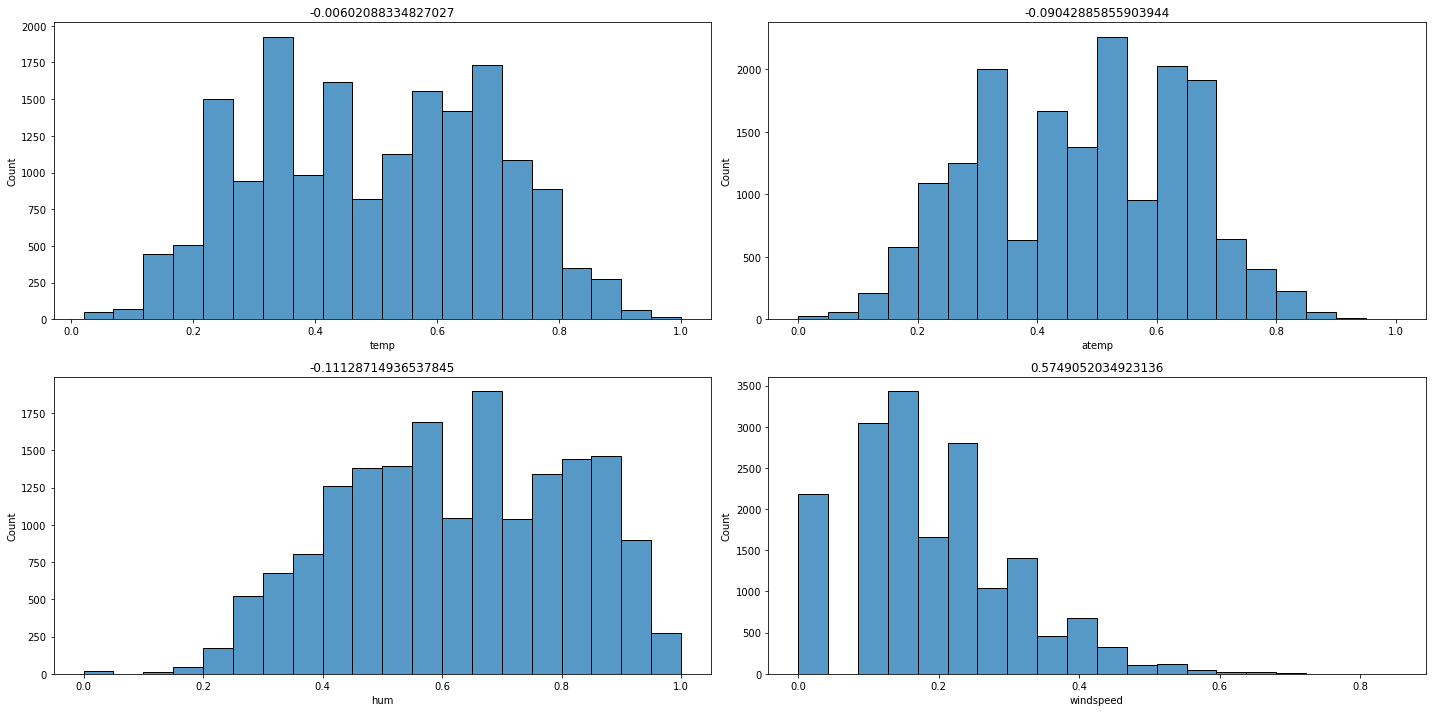

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
    #print(variable)
    #print(subplot)
    sns.histplot(x=variable,data=data_numerical,ax=subplot,bins=20).set_title(data_numerical[variable].skew())

plt.tight_layout() 

**Task 10** Let's construct a histogram of the distribution of the target variable and calculate the slope

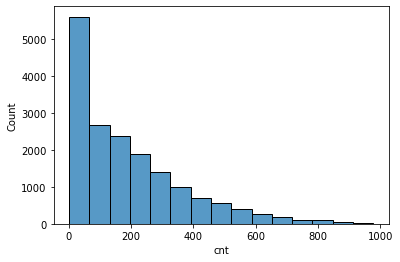

1.2774116037490577

In [16]:
sns.histplot(x='cnt',data=data,bins=15)
plt.show()
data.cnt.skew()

## Conclusions

8. Similarly to the categorical dataset, we select the columns we need and load them into a separate dataset, so that when visualizing it was not necessary to select the columns with numbers we need.
9. Visualized the main numerical indicators using histplot, in temp and atemp we can see the **bimodal distribution**, also in the histograms of the **windspeed distribution where there is a data gap**, you can cut, the asymmetry coefficients can see that in the windspeed graph we have a coefficient greater than 0.5, so you can to say that there is an asymmetric distribution.
10. As you can see, most often cnt (number of ambulance calls) floats in the range of 0-50, it is more than 5000 records, and then the schedule (frequency of a certain number of calls) decreases evenly, smoothly, not reaching 1000. In our case we see a heavy tail on the right, as indicated by our positive (> 0) asymmetry coefficient

### Analysis of relationships between numerical and categorical variables

**Task 11** Let's plot the scatterplot relationship between all numeric variables and the target variable `cnt`

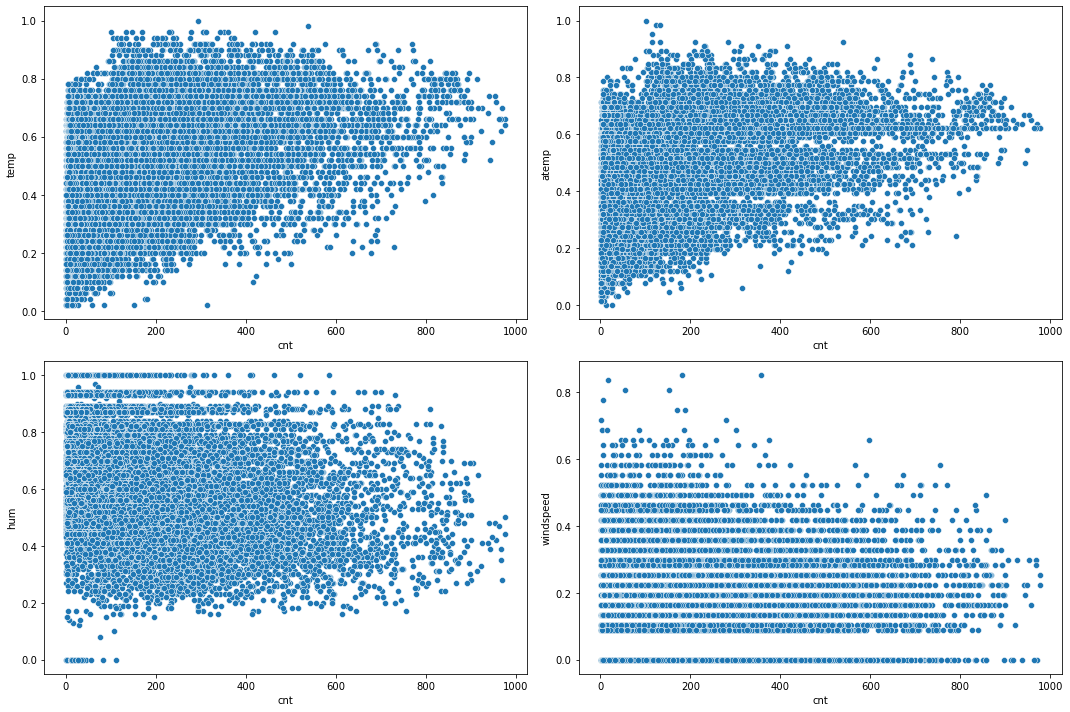

In [17]:
#print(data.head())
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical, ax.flatten()):
    #print(var)
    #print(subplot)
    sns.scatterplot(x='cnt',y=var,data=data,ax=subplot,sizes=(20, 200), legend="full")
    
plt.tight_layout()

**Task 12** Let's look at the ratio between categorical variables and the target variable` cnt` with `boxplot` 

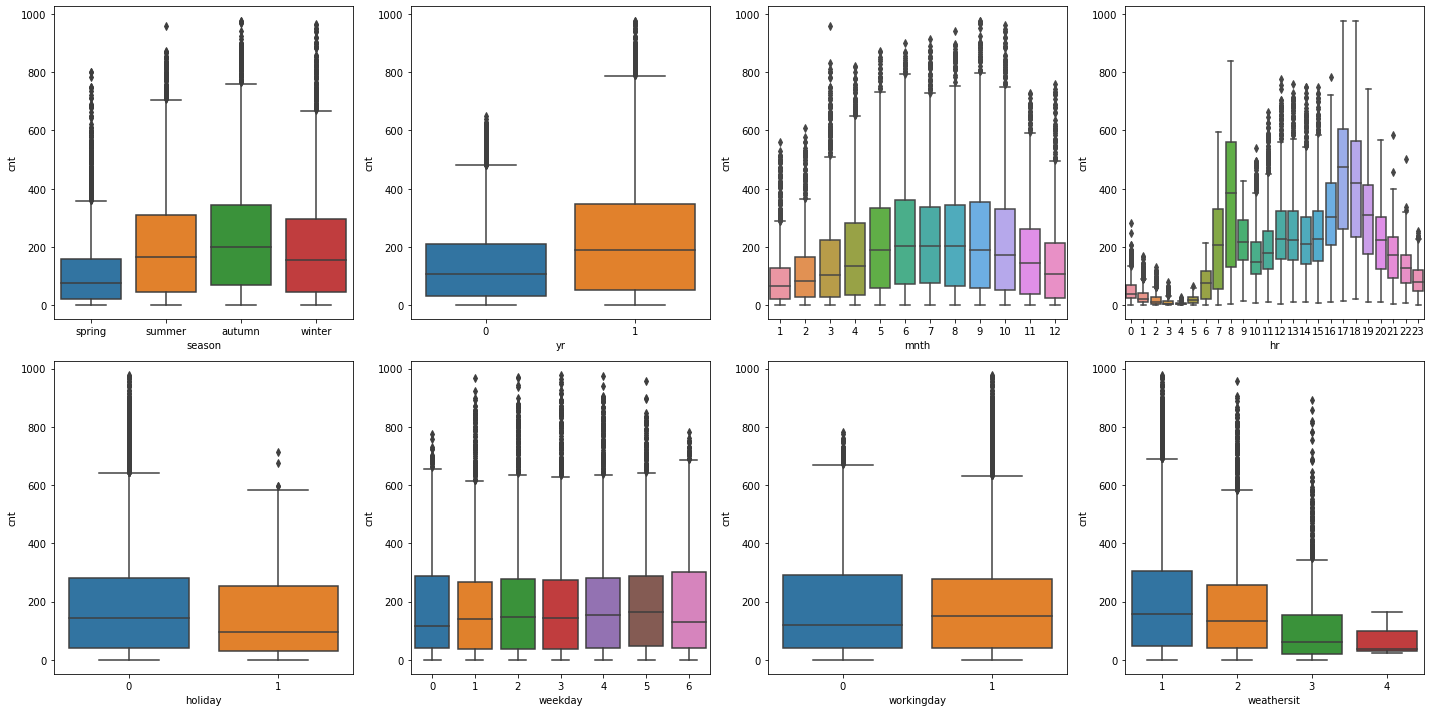

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(x=var,y=data.cnt,data=data_categorical,ax=subplot)
    
plt.tight_layout()

## Conclusions

11. Visualize our numerical data now with a scatterplot, so you can see our data in a different graph, here, too, **you can see the gap in the variable windspeed**

12. Data boxplot is just a duplication of our countplot, the fact that there is such a number of emissions is normal in this case, because our data is not encoded in one numeric interval, are not normalized. From these graphs, we can note the season chart, which shows a slightly larger number of calls during summer and autumn. And also **if you look at the schedule hr we can see a decline in the number of calls at night between 00:00-06:00 and between 18:00-00:00**, which is associated with non-working hours, as well as peaks at 8 am and 5 the day people went to work or returned from work.

**Task 13** Let's construct a correlation matrix:

1. Calculate the correlation coefficients for the data set by the Pearson method
2. Display the obtained matrix of coefficients in the form of a heat card
3. Calculate the correlation coefficients for the data set by the Spearman method
4. Display the obtained matrix of coefficients in the form of a heat card


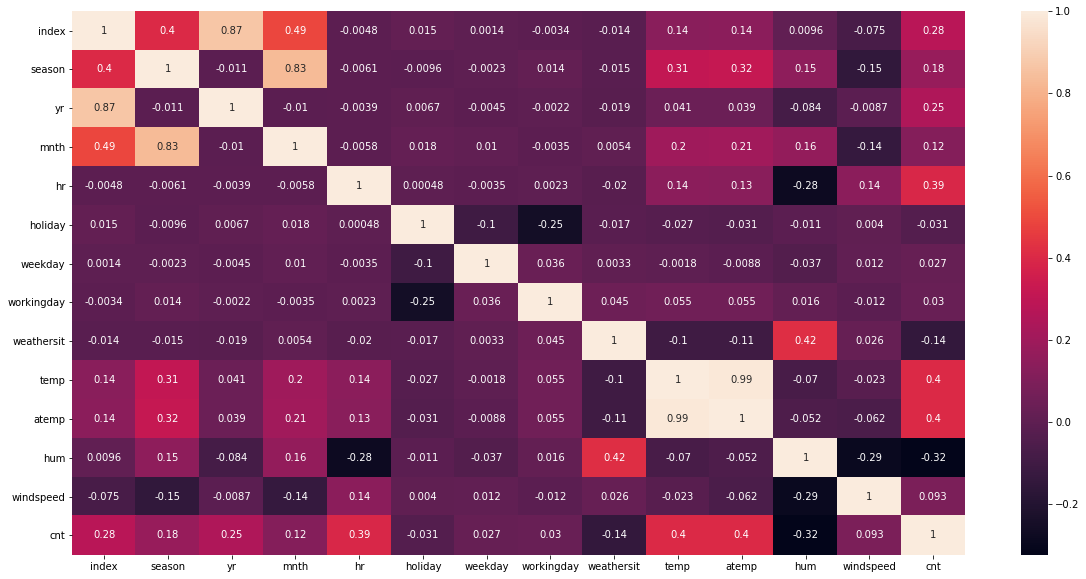

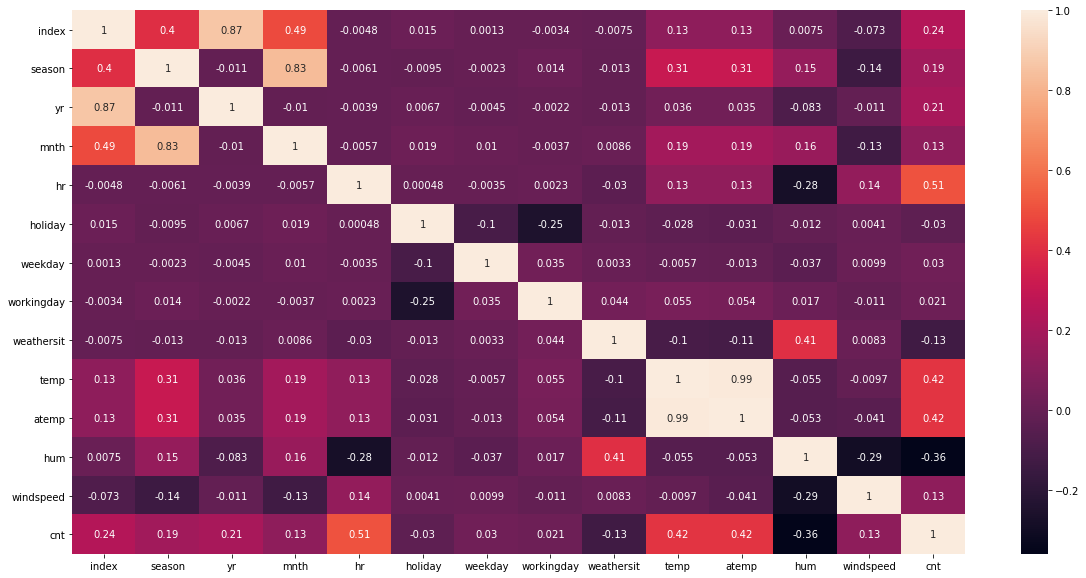

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr('pearson'), annot=True)
plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(data.corr('spearman'), annot=True)
plt.show()

## Conclusions

- We can see **almost complete correlation between variables (0.99) temp (responsible for real temperature) and atemp (how real temperature is felt)**, from which we can conclude that **it is better to delete one of these variables, for more correct operation of the linear regression model** 

- Also you can see a noticeable correlation in hr and cnt, temp and cnt, hum and weatherisit, and a **sufficient negative correlation is noticeable in workingday and holiday**, because when workingday = 1 quite often holiday = 0, etc.

- Spearman's correlation is less sensitive than Pearson's correlation for strong emissions at the ends. And in general on the basic things they are very similar, for example almost all high positive (more than 0.5) and perceptible negative (less than -0.25) are very similar with a small difference sometimes, it is logical because their calculations of correlations are similar

## Starting to built our model after sufficient EDA

**Task 14** Our main steps is:
1. build a model of linear regression:
2. delete variables that are NOT relevant;

3. divide the sample into `train`,` test` and `validation` in the proportion` 70 / 30`;

4. to train the model of linear regression;

To further work with the models for each categorical variable, we will create dummy variables to avoid incorrect category order. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [20]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                      pd.get_dummies(df['season'],prefix='season'),
                      pd.get_dummies(df['mnth'],prefix='mnth'),
                      pd.get_dummies(df['weekday'],prefix='weekday'),
                      pd.get_dummies(df['weathersit'],prefix='weathersit'),
                      pd.get_dummies(df['hr'],prefix='hr')
                      ], axis = 1
                     )
    features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
    return features

In [21]:
features = get_dummies(data)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,1,0,0,0,0
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,0,1,0,0,0
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,0,0,1,0,0
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,...,0,0,0,0,0,0,0,0,1,0


2. Based on the time variable, create a new variable that will correspond to day and night.

In [22]:
features['night_hours'] = (data.hr < 6) | (data.hr > 18)
features = features.astype({'night_hours':'int'})
features = features.drop(['hr','index'], axis = 1)  # removed the index column, which is not required for the model
#features.drop('index',axis = 1)
features.head()
#features.info()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,night_hours
0,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,16,1,...,0,0,0,0,0,0,0,0,0,1
1,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,40,1,...,0,0,0,0,0,0,0,0,0,1
2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,32,1,...,0,0,0,0,0,0,0,0,0,1
3,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,13,1,...,0,0,0,0,0,0,0,0,0,1
4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1


**Linear regression model** 

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [23]:
features_lr = features.drop(['season_1','mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1) 
features_lr

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,night_hours
0,0,0,0,0.24,0.81,0.0000,16,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0.22,0.80,0.0000,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0.22,0.80,0.0000,32,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.24,0.75,0.0000,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0.24,0.75,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.60,0.1642,119,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17375,1,0,1,0.26,0.60,0.1642,89,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17376,1,0,1,0.26,0.60,0.1642,90,0,0,0,...,0,0,0,0,0,0,1,0,0,1
17377,1,0,1,0.26,0.56,0.1343,61,0,0,0,...,0,0,0,0,0,0,0,1,0,1


- We **don't need the date column**, we already have the time of year, month, day of the week, so the need for the date column disappears, and we **delete atemp because we have a temp variable and they are very similar**, atemp is the temperature felt, temp temperature was on that day, so we don't need to duplicate almost the same data with a correlation of 0.99.

In [24]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(target, axis=1)
    y = df[target].copy()
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [26]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [27]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10451.131, test: 10101.388
R^2 train: 0.688, test: 0.680


- R^2 train: 0.688, test: 0.680, so accuracy of 68% is not perfect:D but better than tossing a coin:D

- Because our model has many independent variables, we cannot display their dependency in two-dimensional space, but we can plot the relationship between model residuals and predicted values, which will also help us evaluate the quality of the model.

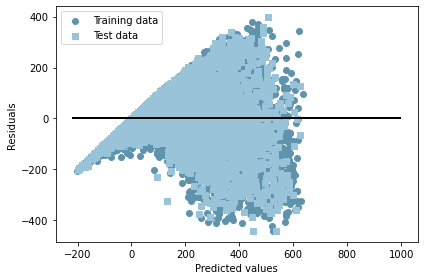

In [29]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')

plt.tight_layout()

## Conclusions

- First, we prepared our data, for the correct operation of the model, repeated some categorical data in the format (0,1) thanks to the function get_dummies (), because machine learning models work with data of this binary type, took extra columns, added another category that is responsible for time, night or day.
- Then wrote f-tion get_train_data to get 4 variables, two are responsible for train and two for test, divided respectively 70/30 according to the data, trained the model (.fit) with our train data
- Made a predict on our data for training and test, then applied special metrics to determine accuracy and we can see that the accuracy of our model on the metric R ^ 2 68%
- We paid a horizontal line with values ​​of -220: 1000 and we can see the relationship between the predicted values ​​and the balances of the model.
- From the graph we see dark circles, this is a sign of errors in predicting the model on the test


# In the end

### In Data Science we have about 5 steps of typical workflow:
1. **Data Collection** - simple type is reading data from files, as csv, more complex is parsing information from websites, getting posts or other information from API and so on
2. **Data Cleaning** - removing or imputing NaN with median, fillna and so on or imputing data with a more advanced methods for example with fancyimpute
3. **EDA(Exploratory Data Analysis)** - it's our visualizations, feature engineering, making hypothesis and so on
4. **Model Building** - in this notebook it's training the LinearRegression model and predicting our target variable, there are a huge amount of models and our task as Data Scientist's make experiments and find the best model with the highest accuracy to suit business needs
5. **Model Deployment** - it is the last step in our workflow, before this step our model working locally in our jupyter notebook and now we need to build our model as a ready software so other can easily use predictions and other benefits from our model

But these 5 steps are a huge amount of work, in DataScience world usually these steps are divided for 3~ specialists, in this project I skipped the firts two steps and invest all my time to make an example of EDA and Model Building

Indeed, Data Science is a huge sphere, there are many knowledge that i must to learn, but as the but as the saying goes: "Rome was not built in one day"!
**So i can't wait to expand my knowledge and build even more complex models on real world projects**